# In this project, I applied plotting, charging, and Data representation in python



The dataset comes from a subset of The National Centers for Environmental Information (NCEI)[Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.
The following variables are provided :

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)


There are 4 steps in this code.
The first is to create a graph of the record high and 
record low temperatures by day of the year over the period 2005-2014. 
The area between the record high and record low temperatures for each day should be shaded.

The second is the overlay a scatter of the 2015 data for any points (highs and lows) for which 
the ten-year record (2005-2014) record high or record low was broken in 2015.

The third is to Watch out for leap days (i.e. February 29th), it is reasonable to remove 
these points from the dataset for the purpose of this visualization.

Finally, the last step is to make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, 
labels, and chart junk.The data is near **Ann Arbor, Michigan, United States**.



In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Loading the data
df = pd.read_csv('data_temperature_Ann Arbor_ Michigan.csv')
df.head()



,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [26]:
# Creating 3 new columns for the year, month and month year.
# The idea is to delete the days of February-29 and separate the df into two groups.
# 2005-2014 and the other group is for 2015

df['Date']       = pd.to_datetime(df['Date'],format='%Y-%m-%d')
df['Year']       = df['Date'].dt.year
df['Month']      = df['Date'].dt.month
df['Month-day']  = pd.to_datetime(df['Date']).dt.strftime('%m-%d')
df['Data_Value'] = df['Data_Value']*0.1

df=df.sort_values('Date',ascending=True)
df.head()

,ID,Date,Element,Data_Value,Year,Month,Month-day
60995,USW00004848,2005-01-01,TMIN,0.0,2005,1,01-01
17153,USC00207320,2005-01-01,TMAX,15.0,2005,1,01-01
17155,USC00207320,2005-01-01,TMIN,-1.1,2005,1,01-01
10079,USW00014833,2005-01-01,TMIN,-4.4,2005,1,01-01
10073,USW00014833,2005-01-01,TMAX,3.3,2005,1,01-01


In [27]:

# Deleting the date February 29
df = df[df['Month-day']!='02-29']

#Here I created the first group. 2005-2014
#For each day, I am getting the maximum temperature TMax and the minimum temperature TMin
df_Min = df[(df['Element']=='TMIN') & (df['Year']!=2015)].groupby(['Month-day'])[('Month','Data_Value')].aggregate({'Data_Value':np.min})
df_Max = df[(df['Element']=='TMAX') & (df['Year']!=2015)].groupby(['Month-day'])[('Month','Data_Value')].aggregate({'Data_Value':np.max})


df_Min.columns = df_Min.columns.droplevel(0)
df_Max.columns = df_Max.columns.droplevel(0)

#Here I created the second group. 2015
#For each day, I am getting the maximum temperature TMax and the minimum temperature TMin
df_2015     = df[(df['Year']==2015)]
df_2015_Min = df[(df['Element']=='TMIN')].groupby(['Month-day'])[('Month','Data_Value')].aggregate({'Data_Value':np.min})
df_2015_Max = df[(df['Element']=='TMAX')].groupby(['Month-day'])[('Month','Data_Value')].aggregate({'Data_Value':np.max})


df_2015_Min.columns = df_2015_Min.columns.droplevel(0)
df_2015_Max.columns = df_2015_Max.columns.droplevel(0)

# Reseting the index to organize the columns.
df_Min = df_Min.reset_index()
df_Max = df_Max.reset_index()

df_2015_Min = df_2015_Min.reset_index()
df_2015_Max = df_2015_Max.reset_index()


#df_2015_Min['Month-day'] = pd.to_datetime(df_2015_Min['Month-day'],format='%m-%d')

df_Min.head()

,Month-day,Month,Data_Value
0,01-01,1,-16.0
1,01-02,1,-26.7
2,01-03,1,-26.7
3,01-04,1,-26.1
4,01-05,1,-15.0


In [28]:
#Finding the breaking points from 2015 that break the records(2005-2014)
df_2015_breakHigh = np.where(df_2015_Max['Data_Value'] > df_Max['Data_Value'])
df_2015_breakLow  = np.where(df_2015_Min['Data_Value'] < df_Min['Data_Value'])


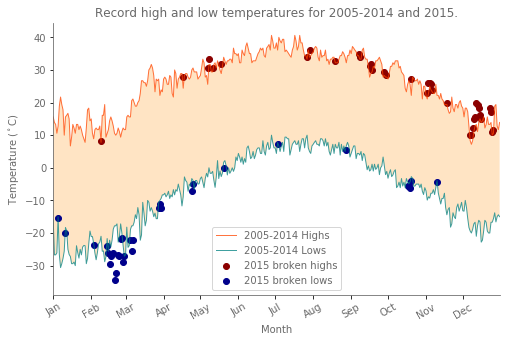

In [29]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker



#days used in the x axis
data_range = df_2015['Date'].unique()


fig,ax     = plt.subplots(nrows=1, ncols=1, figsize = (8,5))

ax.set_title('Record high and low temperatures for 2005-2014 and 2015.', color='dimgray') # Setting the title
ax.set_xlabel('Month', color ='dimgray')
ax.set_ylabel('Temperature ($^\circ$C)', color='dimgray')


#plotting the maximum and minimum temperatures from 2004-2015
plt.plot(data_range,df_Max['Data_Value'], color='orangered',linewidth = 1, alpha=0.75, label = '2005-2014 Highs')
plt.plot(data_range,df_Min['Data_Value'], color='teal',linewidth = 1, alpha=0.75, label = '2005-2014 Lows')
plt.fill_between(data_range, df_Min['Data_Value'], df_Max['Data_Value'], facecolor='bisque')

#plotting the breaking points from 2015
plt.scatter(data_range[df_2015_breakHigh], df_2015_Max['Data_Value'].iloc[df_2015_breakHigh], c='darkred', label='2015 broken highs' )
plt.scatter(data_range[df_2015_breakLow],  df_2015_Min['Data_Value'].iloc[df_2015_breakLow], c='darkblue', label='2015 broken lows' )

#changing the format to appear the months in the axis x
ax.xaxis.set_major_locator(mdates.MonthLocator())
monthFmt = mdates.DateFormatter('%b')
ax.xaxis.set_major_formatter(monthFmt)

ax.set_xlim([data_range[0], data_range[-1]])
plt.xticks(rotation=30,color='dimgray')
plt.yticks(color='dimgray')

plt.legend(loc='best')
plt.setp(plt.legend().get_texts(), color='dimgray')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['bottom'].set_color('dimgray')
ax.spines['left'].set_color('dimgray')

plt.show()